In [8]:
 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Optional: For better visuals
sns.set(style="whitegrid")

In [9]:
data_path = os.path.join("..", "data")

In [10]:
transactions = pd.read_csv(os.path.join(data_path, "transactions.csv"))
products = pd.read_csv(os.path.join(data_path, "products.csv"))
stores = pd.read_csv(os.path.join(data_path, "stores.csv"))


In [11]:
print("\nTRANSACTIONS\n", transactions.head())
print("\nPRODUCTS\n", products.head())
print("\nSTORES\n", stores.head())



TRANSACTIONS
             Invoice ID  Line  Customer ID  Product ID Size    Color  \
0  INV-US-001-03558761     1        47162         485    M      NaN   
1  INV-US-001-03558761     2        47162        2779    G      NaN   
2  INV-US-001-03558761     3        47162          64    M  NEUTRAL   
3  INV-US-001-03558762     1        10142         131    M     BLUE   
4  INV-US-001-03558762     2        10142         716    L    WHITE   

   Unit Price  Quantity                 Date  Discount  Line Total  Store ID  \
0        80.5         1  2023-01-01 15:42:00       0.0        80.5         1   
1        31.5         1  2023-01-01 15:42:00       0.4        18.9         1   
2        45.5         1  2023-01-01 15:42:00       0.4        27.3         1   
3        70.0         1  2023-01-01 20:04:00       0.4        42.0         1   
4        26.0         1  2023-01-01 20:04:00       0.0        26.0         1   

   Employee ID Currency Currency Symbol               SKU Transaction Type  \

In [18]:
merged = transactions.merge(products, on="Product ID", how="left")
merged = merged.merge(stores, on="Store ID", how="left")

In [20]:
merged['Date'] = pd.to_datetime(merged['Date'])

In [21]:
merged['month'] = merged['Date'].dt.to_period('M')

In [27]:
monthly_sales = merged.groupby(['month', 'Category'])['Line Total'].sum().reset_index()
monthly_sales.rename(columns={'Line Total': 'total_amount'}, inplace=True)


In [29]:
print(merged.dtypes)


Invoice ID                     object
Line                            int64
Customer ID                     int64
Product ID                      int64
Size                           object
Color_x                        object
Unit Price                    float64
Quantity                        int64
Date                   datetime64[ns]
Discount                      float64
Line Total                    float64
Store ID                        int64
Employee ID                     int64
Currency                       object
Currency Symbol                object
SKU                            object
Transaction Type               object
Payment Method                 object
Invoice Total                 float64
Category                       object
Sub Category                   object
Description PT                 object
Description DE                 object
Description FR                 object
Description ES                 object
Description EN                 object
Description 

In [30]:
merged['Date'] = pd.to_datetime(merged['Date'], errors='coerce')


In [31]:
cols_to_save = ['Invoice ID', 'Customer ID', 'Product ID', 'Date', 'Category', 'Line Total', 'Store ID']
merged[cols_to_save].to_csv(os.path.join(data_path, "merged_sales_data.csv"), index=False)


In [32]:
for col in merged.columns:
    if merged[col].apply(lambda x: isinstance(x, (list, dict, set))).any():
        print(f"Dropping column {col} due to unsupported type")
        merged.drop(columns=[col], inplace=True)


In [35]:
monthly_sales['month'] = monthly_sales['month'].astype(str)


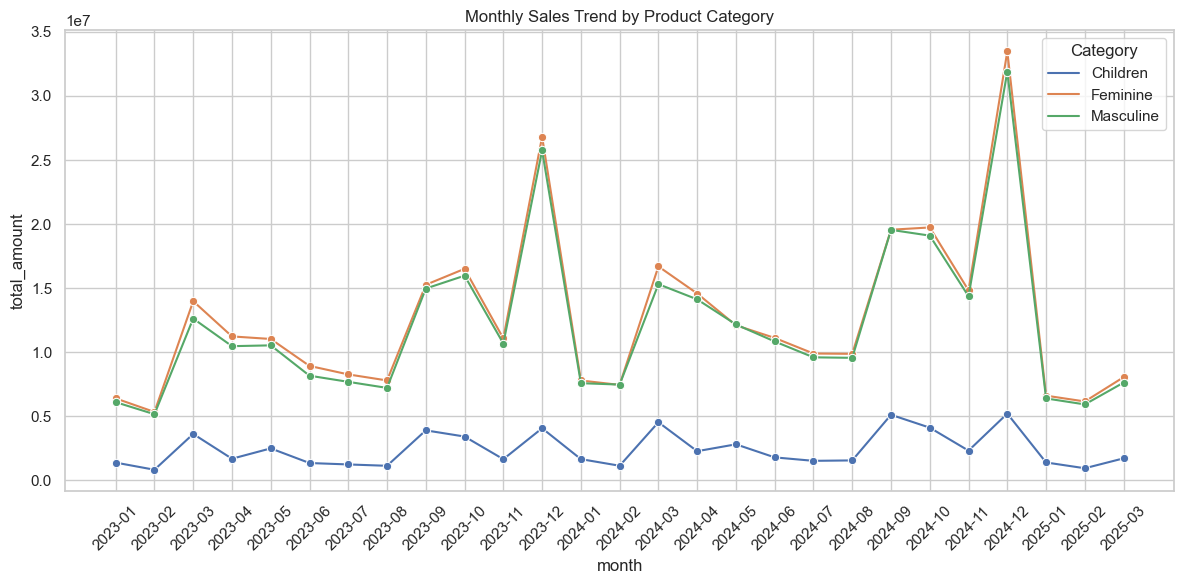

In [40]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='month', y='total_amount', hue='Category', marker="o")
plt.title('Monthly Sales Trend by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join("..", "visuals", "monthly_sales_trend.png"))
plt.show()


 This line chart displays the monthly sales trends for three product categories—Children, Feminine, and Masculine—from January 2023 to March 2025.
Each line represents the total sales amount for that category in a given month.

 Categories with Rising or Falling Sales:
* Feminine:

Shows consistently high sales, often slightly higher than Masculine.

Exhibits sharp spikes in December 2023 and December 2024, indicating seasonal boosts.

* Masculine:

Follows a similar trend to Feminine, with comparable sales figures.

Also experiences spikes in December 2023 and December 2024, slightly below Feminine.

* Children:

Sales are significantly lower throughout the period.

Some minor peaks appear (e.g., March 2023, October 2023, September 2024), but overall sales remain much more stable and lower than the adult categories.

Seasonal Trends or Spikes Observed:
Major sales spikes in December (both 2023 and 2024) across all categories.

Noticeable increase around March 2023 and March 2024, especially for Feminine and Masculine.

September 2024 and October 2024 also show increased sales.



In [38]:
# Total sales by product category
total_sales_by_category = merged.groupby('Category')['Invoice Total'].sum().sort_values(ascending=False)
print(total_sales_by_category)

# Average monthly sales per category
avg_monthly_sales = monthly_sales.groupby('Category')['total_amount'].mean()
print(avg_monthly_sales)

# Find peak month per category
peak_months = monthly_sales.loc[monthly_sales.groupby('Category')['total_amount'].idxmax()]
print(peak_months)


Category
Feminine     7.173631e+08
Masculine    6.792013e+08
Children     1.661040e+08
Name: Invoice Total, dtype: float64
Category
Children     2.410375e+06
Feminine     1.261798e+07
Masculine    1.211035e+07
Name: total_amount, dtype: float64
      month   Category  total_amount
69  2024-12   Children     5215878.1
70  2024-12   Feminine    33480443.8
71  2024-12  Masculine    31901651.3


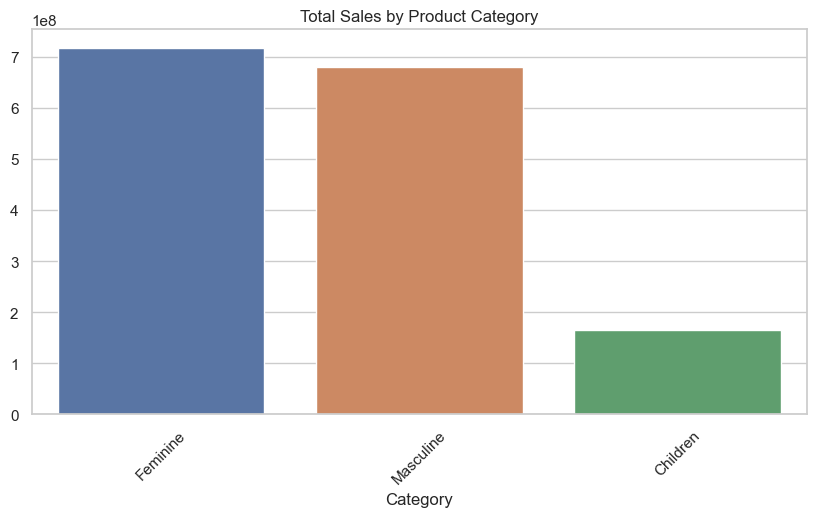

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(x=total_sales_by_category.index, y=total_sales_by_category.values)
plt.title('Total Sales by Product Category')
plt.xticks(rotation=45)
plt.show()
